# Project 2: Classification with Kernelized Perceptron

## Objectives
Your goal in this project is to get comfortable in implementing kernelized perceptron for classification. To complete this project, you should understand the following:

* How to use basic math and machine learning modules in python such as numpy, matplotlib, and sklearn
* How to train a kernel perceoptron model *from scratch*
* How to select an approprite kernel function for a task.
* How to perform model section when facing multiple choices
* How to evaluate the test results and visualize the outcome of an ML model 

## Deliverable
* Project report/writeup: A `project2_report_lastname.pdf` file with corresponding plots and results for the project. Follow the `Project 2 - Report (Individual Submission)` link on Gradescope to upload this file. The project report should include a brief justification of your solution at a high-level, e.g., using any relevant explanations, equations, or pictures that help to explain your solution. You should also describe what your code does, e.g. using a couple of sentences per function to describe your code structure. 

* Source code: A `project2_src_lastname1[_lastname2].ipynb` (or `.zip`) file with a working copy of your solutions compiled in a Jupyter notebook. Follow the `Project 2 - Source Code (Group Submission)` link to upload this file.


## Logistics

* You can work in groups of 1-2 students for each course project, and it's your responsibility to find a group (e.g. use Ed Discussion). 
* Every member of a group must complete and submit the project report/writeup individually. While the source code can be the same for all group members, the project report needs to be written independently by each person and, thus, should differ among team member and students more generally.
* One one group member need to submit the source code. If you submit as a group, make sure to include your teammate in the group submission. Instructions for team submission can be found [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
* Grades will be provided based on the individual project report. The source code submission will not be graded, but the teaching staff may check the source files if they see the need for reproducing your results when going through your project report. 
* Failure to submit the source code will lead to a deduction of points from your total.


## Task 2A: 

<!-- ### Loading math, machine learning, and visualization modules
We start importing some modules and running some magic commands -->

In this problem, you will use perceptron to deal with a 2-D classification problem.

### Dataloader
The reference code for generating the training and test set (and plot) is provided as below.



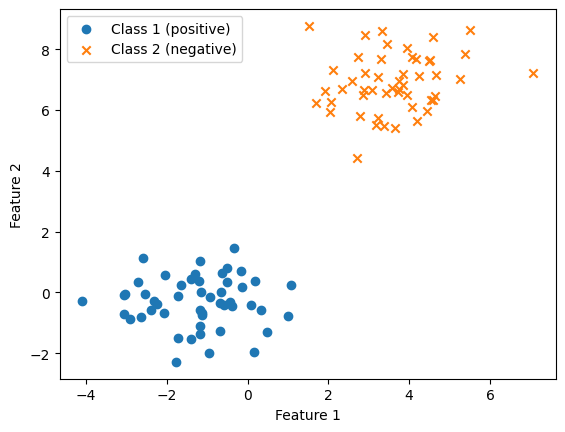

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
from sklearn.metrics import accuracy_score
# fix random seed for reproducibility
np.random.seed(40)

# Step 1: Define dataset parameters
num_samples = 100
dimensionality = 2
num_classes = 2

# Step 2: Generate random data points for each class
mean_class1 = np.random.randn(dimensionality) * 2
mean_class2 = np.random.randn(dimensionality) * 2 + 5
data_class1 = mean_class1 + np.random.randn(num_samples // 2, dimensionality)
data_class2 = mean_class2 + np.random.randn(num_samples // 2, dimensionality)

# Step 3: Assign class labels (-1 for class 1 and 1 for class 2)
labels_class1 = -np.ones(num_samples // 2)
labels_class2 = np.ones(num_samples // 2)

# Step 4: Combine data and labels, and shuffle the dataset
data = np.vstack((data_class1, data_class2))
labels = np.hstack((labels_class1, labels_class2))
permutation = np.random.permutation(num_samples)
data = data[permutation]
labels = labels[permutation]

# Split the dataset into training and testing sets (e.g., 80% training, 20% testing)
split_ratio = 0.8
split_index = int(split_ratio * num_samples)
Xtr, Xtest = data[:split_index], data[split_index:]
Ytr, Ytest  = labels[:split_index], labels[split_index:]

# Visualize the dataset (optional)
plt.scatter(data_class1[:, 0], data_class1[:, 1], label='Class 1 (positive)', marker='o')
plt.scatter(data_class2[:, 0], data_class2[:, 1], label='Class 2 (negative)', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Perceptron (30pt)

In this section, we are going to implement a binary classifier with the `Perceptron` class. Fill in the code in the `Perceptron` class to implement the `fit`, `project`, and `predict` methods.

In [152]:
class Perceptron(object):

    def __init__(self, T=1):
        self.T = T # number of iterations
        
    def fit(self, X, y):
        """
        Train perceptron model on data X with labels y and iteration T.
        """
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features, dtype=np.float64)
        self.b = 0.0
        #### YOUR CODE HERE ####
        eta = 1 
        for i in range(self.T): 
            for j in range(n_samples):
                y_hat = self.predict(X[j]) 
                if y_hat != y[j]:
                    self.w += eta*y[j]*X[j]
                    self.b += eta * y[j]



        

    def predict(self, X):
        """
        Predict class labels for samples in X. Must use the project method.
        Output should be a 1D array with shape (n_samples,)
        """
        X = np.atleast_2d(X)

        #### YOUR CODE HERE ####
        return np.sign(X@self.w + self.b)

In [153]:
# You should achieve 100% accuracy on the test set

model = Perceptron(T=1)
model.fit(Xtr, Ytr)
y_pred = model.predict(Xtest)
print('Accuracy: %.2f%%' % (np.mean(y_pred == Ytest) * 100))

Accuracy: 100.00%


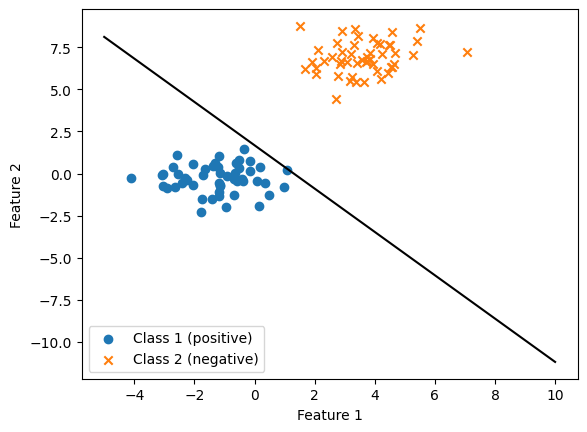

In [154]:
# Plot the decision boundary
w = model.w
b = model.b
x1 = np.linspace(-5, 10, 100)
x2 = (-w[0] * x1 - b) / w[1]
plt.plot(x1, x2, 'k-')
plt.scatter(data_class1[:, 0], data_class1[:, 1], label='Class 1 (positive)', marker='o')
plt.scatter(data_class2[:, 0], data_class2[:, 1], label='Class 2 (negative)', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Kernel Trick (40pt)

Recall that in class ("Kernel Methods"), we discussed the *Kernel Perceptron* algorithm. The decision function for the Kernel Perceptron is given by

$$
f(\mathbf{x}) = \text{sign}\left(\sum_{i=1}^{n} \alpha_i y_i k(\mathbf{x}_i, \mathbf{x})\right)
$$

where $k(\mathbf{x}_i, \mathbf{x})$ is the kernel function, $\alpha_i$ are the learned weights, and $y_i$ are the labels.

The kernel (Gram) matrix induced by kernel function *k* over *n* data points is defined as

$$
\mathbf{K}=
\left(\begin{array}{ccc} 
k(\mathbf{x}_1,\mathbf{x}_1) & \dots & k(\mathbf{x}_1,\mathbf{x}_n)\\
\vdots & \ddots & \vdots \\
k(\mathbf{x}_n,\mathbf{x}_1) & \dots & k(\mathbf{x}_n,\mathbf{x}_n)
\end{array}\right)
$$ 

Given a test data point **x**, the predicted label is

$$
\hat{y} = \text{sign}\left(\sum_{i=1}^{n} \alpha_i y_i k(\mathbf{x}_i, \mathbf{x})\right)
$$

The Kernel Perceptron algorithm iteratively updates the weights $\alpha_i$ based on the misclassified points in the training set (please refer to lecture notes on "kernel").

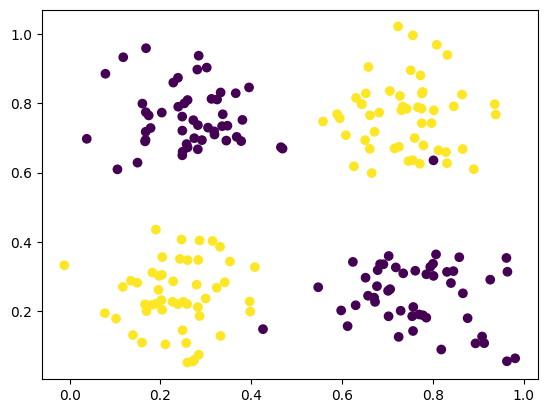

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Fix random seed for reproducibility
np.random.seed(42)

# Number of samples per quadrant
n = 50

# Standard deviation for Gaussian distribution
std_dev = 0.1

# Quadrant 1 and 3: label 1
q1 = np.random.normal(loc=[0.25, 0.25], scale=std_dev, size=(n, 2))
q3 = np.random.normal(loc=[0.75, 0.75], scale=std_dev, size=(n, 2))

# Quadrant 2 and 4: label -1
q2 = np.random.normal(loc=[0.75, 0.25], scale=std_dev, size=(n, 2))
q4 = np.random.normal(loc=[0.25, 0.75], scale=std_dev, size=(n, 2))

X = np.vstack((q1, q3, q2, q4))
y = np.hstack((np.ones(2*n), -np.ones(2*n)))

# Split the data into training and testing sets
Xtr, Xtest, Ytr, Ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [156]:
# Plot the decision boundary
def plot_decision_bounday_kernel_perceptron(model):
    x1 = np.linspace(0, 1, 50)
    x2 = np.linspace(0, 1, 50)
    xx1, xx2 = np.meshgrid(x1, x2)
    Z = np.zeros(xx1.shape)
    for i in range(xx1.shape[0]):
        for j in range(xx1.shape[1]):
            Z[i,j] = model.predict([xx1[i,j], xx2[i,j]])
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

Recall in lecture, we have seen different kernels for $\mathbb{R}^d$. Here are three common kernels below:


$$
k_{\text{linear}}(\mathbf{x},\mathbf{x}')=\mathbf{x}^\top \mathbf{x}.
$$

$$
k_{\text{poly}}(\mathbf{x},\mathbf{x}')=(1+\mathbf{x}^\top \mathbf{x}')^d.
$$

$$
k_{\text{RBF}}(\mathbf{x},\mathbf{x}') = \exp(-\frac{\lVert \mathbf{x}-\mathbf{x'} \rVert^2_2}{\sigma^2})
$$

Please fill the following code block for kernel functions and kernel perceptron. Then run the next four code blocks to see decision boundaries corresponding to different kernels. (You should *not* use the other libraries such as scikit-learn.)

In [158]:
class LinearKernel:
    def __init__(self):
        pass
    def __call__(self, x, y):
        #### YOUR CODE HERE ####
        return x.T@y


class PolynomialKernel:
    def __init__(self, p=1):
        self.p = p
        

    def __call__(self, x, y):
        #### YOUR CODE HERE ####
        return np.power((1+x.T@y), self.p)


class GaussianKernel:
    def __init__(self, sigma=5):
        self.sigma = sigma

    def __call__(self, x, y):
        #### YOUR CODE HERE ####
        return np.exp(-np.linalg.norm(x-y)/np.power(self.sigma,2))

    
class KernelPerceptron(object):

    def __init__(self, kernel=LinearKernel(), T=1):
        self.kernel = kernel
        self.T = T # number of iterations
        self.alpha = None
        self.Xtra = None
        self.ytra = None

    def fit(self, X, y):
        self.Xtra, self.ytra = X, y
        n_samples, n_features = X.shape
        self.alpha = np.zeros(n_samples, dtype=np.float64)
        # Gram matrix
        gram_matrix = np.zeros((n_samples,n_samples))
        #### YOUR CODE HERE ####
        for i in range(n_samples):
            for j in range(n_samples):
                gram_matrix[i][j] = self.kernel(X[i],X[j])
        # Training loop to update alpha
        #### YOUR CODE HERE ####
        for _ in range(self.T):
            for i in range(n_samples):
                y_hat = np.sign(np.sum(self.alpha * self.ytra*gram_matrix[:,i]))
                if y_hat != self.ytra[i]:
                    self.alpha[i] += 1 

            
    def predict(self, X):
        X = np.atleast_2d(X)
        print(X.shape)
        n_samples, n_features = X.shape
        y_pred = np.zeros(n_samples)

        for i in range(n_samples):
            ans = 0 
            for j in range(len(self.Xtra)): 
                ans += (self.kernel(X[i], self.Xtra[j]) * self.alpha[j] * self.ytra[j])
            y_pred[i] = np.sign(ans)

        return (y_pred)

        
        #### YOUR CODE HERE ####

#### Is the dataset linearly separable?
Try the linear kernel and plot the decision boundary. You will find that linear kernel couldn't do the job.

(40, 2)
Accuracy: 25.00%
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1

/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/1044529558.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = model.predict([xx1[i,j], xx2[i,j]])


(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)

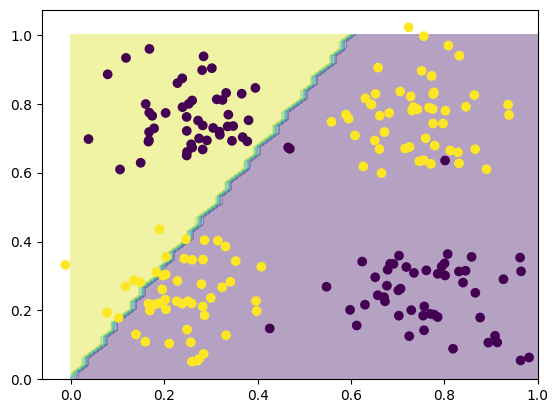

In [159]:
## results for linear kernel
model = KernelPerceptron(kernel=LinearKernel(), T=1)
model.fit(Xtr, Ytr)
y_pred = model.predict(Xtest)
print('Accuracy: %.2f%%' % (accuracy_score(Ytest, y_pred) * 100))
plot_decision_bounday_kernel_perceptron(model)

#### Can we do better with more powerful kernels?
Try to tune the hyperparameters of kernels and number of iterations of achieve accuracy above 90% with `PolynomialKernel` and  `GaussianKernel`.

(40, 2)
Accuracy: 95.00%
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1

/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/1044529558.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = model.predict([xx1[i,j], xx2[i,j]])


(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)

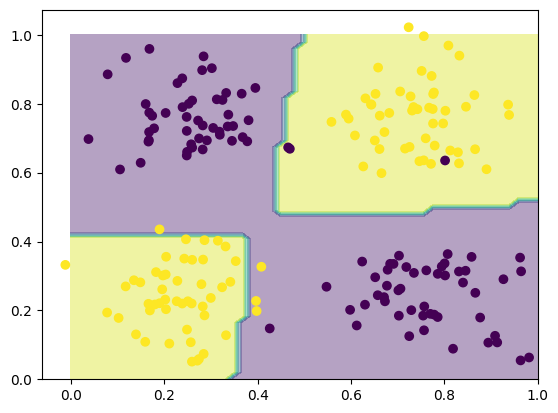

In [160]:
## results for polynomial_kernel
model = KernelPerceptron(kernel=PolynomialKernel(p=5), T=5)
model.fit(Xtr, Ytr)
y_pred = model.predict(Xtest)
print('Accuracy: %.2f%%' % (accuracy_score(Ytest, y_pred) * 100))
plot_decision_bounday_kernel_perceptron(model)


(40, 2)
Accuracy: 97.50%
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1

/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/1044529558.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = model.predict([xx1[i,j], xx2[i,j]])


(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)
(1, 2)

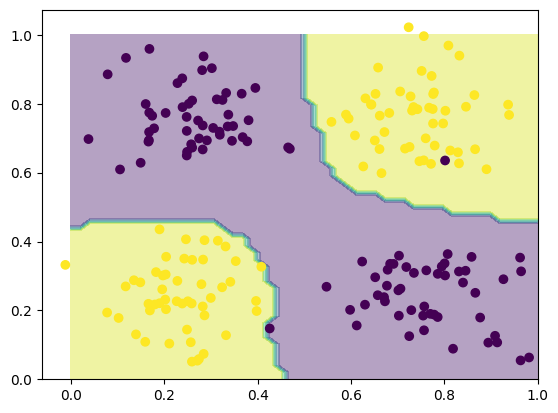

In [161]:
## results for gaussian_kernel
model = KernelPerceptron(kernel=GaussianKernel(), T=15)
model.fit(Xtr, Ytr)
y_pred = model.predict(Xtest)
print('Accuracy: %.2f%%' % (np.mean(y_pred == Ytest) * 100))
plot_decision_bounday_kernel_perceptron(model)



## Task 2B: Real World Data: Seoul Bike Rental Data (30pt)

In this dataset on bike rentals in Seoul, there are 6 features related to weather conditions and 1 feature denoting the hour of the day. The response label is the number of rented bikes. The task is to predict whether `Rented Bike Count` is greater than 500 from the other features.

<!-- ### Loading math, machine learning, and visualization modules
We start importing some modules and running some magic commands -->

In [ ]:
# Unzip the data to the current directory. Change the path accordingly if needed.
# You may use your OS tool or the following code.
# install unzip if needed
!unzip ./pa2_data.zip

unzip:  cannot find or open ./pa2_data.zip, ./pa2_data.zip.zip or ./pa2_data.zip.ZIP.


In [162]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

filename = 'data/SeoulBikeData.csv'
df = pd.read_csv(filename).drop(['Date', 'Seasons', 'Holiday', 'Functioning Day'], axis=1)
df = df[(df['Rented Bike Count'] <= 500) | (df['Rented Bike Count'] > 500)]
df = df.sample(n=1000, random_state=4)
X = df.drop(['Rented Bike Count'],  axis=1)[[
                                            'Hour', 
                                            'Temperature (deg C)', 
                                            'Humidity(%)', 
                                            'Visibility (10m)',
                                            'Dew point temperature (deg C)',
                                            'Solar Radiation (MJ/m2)',
                                            'Rainfall(mm)'
                                            ]]
y = df['Rented Bike Count'].values
# binarize y
y = np.where(y <= 500, -1, 1)
y = np.expand_dims(y, 1)

print(f"Shape X {X.shape}")
print(f"Shape y {y.shape}")
print("y distribution: ", np.unique(y, return_counts=True))

X = StandardScaler().fit_transform(X)

Xtr, Xtest, Ytr, Ytest = train_test_split(X, y, test_size=0.2, random_state=42)

Shape X (1000, 7)
Shape y (1000, 1)
y distribution:  (array([-1,  1]), array([478, 522]))


### Kernel Selection ###

Find a proper kernel function to solve the classification task. 

1. Identify and implement a new kernel function of your choice, e.g., sigmoid kernel. 

2. Use two other kernels used in 2A, namely `PolynomialKernel` and `GaussianKernel`. 

3. Try to optimize hyperparameter(s) of each kernel. Please do a bit of background research and select a range of 5 values for the parameters that seem reasonable and create an additional `dev` split from the training data to select the optimal hyperparameter. Then train a model using the best hyperparameter(s) on the whole training set and test the model on the test set. Justify in your report your choice for the 5 values. 

Discuss how accuracy compares across all methods. 

*Note: Depending on your implementation, this may take several minutes to run. If you find that it is taking prohibitively long, try to optimize your code. A reasonable accuracy can range from 60% to 80% depending on the selected kernel.* 

In [ ]:
Xtr, Xval = Xtr[:int(len(Xtr)*0.8)], Xtr[int(len(Xtr)*0.8):]
Ytr, Yval = Ytr[:int(len(Ytr)*0.8)], Ytr[int(len(Ytr)*0.8):]

In [180]:
## results for polynomial_kernel
parameter = [2,3,4,5,6]
iter = [1,5,10,15,30]

for i in parameter:
    for j in iter:
        print("p: " + str(i) + " iter: " + str(j))
        model = KernelPerceptron(kernel=PolynomialKernel(p=i), T=j)
        model.fit(Xtr, Ytr)
        y_pred = model.predict(Xtest)
        print('Accuracy: %.2f%%' % (accuracy_score(Ytest, y_pred) * 100))

p: 2 iter: 1
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 52.50%
p: 2 iter: 5
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 52.50%
p: 2 iter: 10
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 52.50%
p: 2 iter: 15
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 52.50%
p: 2 iter: 30
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 52.50%
p: 3 iter: 1
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 71.00%
p: 3 iter: 5
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 71.00%
p: 3 iter: 10
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 71.00%
p: 3 iter: 15
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 71.00%
p: 3 iter: 30
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 71.00%
p: 4 iter: 1
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 52.50%
p: 4 iter: 5
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 52.50%
p: 4 iter: 10
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 52.50%
p: 4 iter: 15
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 52.50%
p: 4 iter: 30
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 52.50%
p: 5 iter: 1
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 68.00%
p: 5 iter: 5
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 67.50%
p: 5 iter: 10
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 67.50%
p: 5 iter: 15
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 67.50%
p: 5 iter: 30
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 67.50%
p: 6 iter: 1
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 52.50%
p: 6 iter: 5
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 52.50%
p: 6 iter: 10
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 52.50%
p: 6 iter: 15
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 52.50%
p: 6 iter: 30
(200, 7)


/var/folders/sh/0l9tlp4j5fs_2fb0_19y7xq00000gn/T/ipykernel_98144/755197686.py:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = np.sign(ans)


Accuracy: 52.50%


In [1]:
# find best signma for gaussian kernel

i = 0.04
while i < 1.5:
    model = KernelPerceptron(kernel=GaussianKernel(sigma=i), T=100)
    model.fit(Xtr, Ytr)
    y_pred_s = model.predict(Xtest)
    print(i)
    print('Accuracy: %.2f%%' % (np.mean(y_pred == Ytest.flatten()) * 100))
    i += 0.001   

NameError: name 'KernelPerceptron' is not defined

In [ ]:
# design a new kernel and 
class NewKernel(object):
    def __init__(self, gamma, beta):
        #### YOUR CODE HERE ####
        self.gamma = gamma
        self.beta =beta
    def __call__(self, x, y):
        #### YOUR CODE HERE ####
        return np.tanh(self.gamma*x@y+self.beta)
    
# find best parameters


IndentationError: expected an indented block after function definition on line 3 (1439854746.py, line 7)

# Bonus (10pt): Feature Selection for Task 2B

Can you improve on your Accuracy by doing feature selection? Choose a process for doing so and implement it. Explain your choices and the results. What do you notice about the most useful features? Do they make sense to you? You can experiment with one or any kernels for your exploration.

 